# Practical 4: Data Wrangling
  
**Name:** Priyanka Patil  
**Roll No:**  104
**DIV:**  B(BE)


In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import warnings

In [2]:
# Supressing update warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_csv("./datasets/Bengaluru_House_Data.csv") 

In [4]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.shape 

(13320, 9)

In [6]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
df1['area_type']

0        Super built-up  Area
1                  Plot  Area
2              Built-up  Area
3        Super built-up  Area
4        Super built-up  Area
                 ...         
13315          Built-up  Area
13316    Super built-up  Area
13317          Built-up  Area
13318    Super built-up  Area
13319    Super built-up  Area
Name: area_type, Length: 13320, dtype: object

In [8]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [10]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns') 

In [11]:
df2.shape

(13320, 5)

In [12]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df2.shape 

(13320, 5)

In [14]:
df3 = df2.dropna() 
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
df3.shape 

(13246, 5)

In [16]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [18]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [21]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
def is_float(x):
    try:
        float(x) 
        return True
    except(ValueError, TypeError):
        return False 

In [23]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [24]:
def convert_sqft_to_num(x): 
    tokens = x.split('-')
    if len(tokens) == 2:
        try:
            return (float(tokens[0])+float(tokens[1]))/2
        except ValueError:
            return None
    try:
        return float(x) 
    except ValueError:
        return None 
    
result = convert_sqft_to_num('2100 - 2850')
print(result)

2475.0


In [25]:
convert_sqft_to_num('34.46Sq. Meter') 
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num) 
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [26]:
df4 = df4[df4.total_sqft.notnull()] 
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [27]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [28]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft'] 
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [29]:
df5_stats = df5['price_per_sqft'].describe() 
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [30]:
df5.to_csv("./datasets/bhp.csv",index=False)

In [31]:
df5.location = df5.location.apply(lambda x: x.strip()) 
location_stats = df5['location'].value_counts(ascending=False) 
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [32]:
len(location_stats[location_stats>10])

240

In [33]:
len(location_stats) 

1287

In [34]:
len(location_stats[location_stats<=10]) 

1047

In [35]:
location_stats_less_than_10 = location_stats[location_stats<=10] 
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [36]:
len(df5.location.unique())

1287

In [37]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x) 
len(df5.location.unique())

241

In [38]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [39]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [40]:
df5.shape 

(13200, 7)

In [41]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)] 
df6.shape

(12456, 7)

In [42]:
df6.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

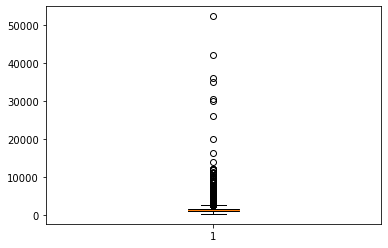

In [43]:
plt.boxplot(df6['total_sqft']) 
plt.show()

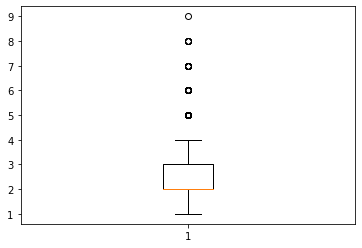

In [44]:
Q1 = np.percentile(df6['total_sqft'], 25.) # 25th percentile of the data of the given feature 
Q3 = np.percentile(df6['total_sqft'], 75.) # 75th percentile of the data of the given feature 
IQR = Q3-Q1 #Interquartile Range
ll = Q1 - (1.5*IQR) 
ul = Q3 + (1.5*IQR)
upper_outliers = df6[df6['total_sqft'] > ul].index.tolist() 
lower_outliers = df6[df6['total_sqft'] < ll].index.tolist() 
bad_indices = list(set(upper_outliers + lower_outliers)) 
drop = True
if drop:
    df6.drop(bad_indices, inplace = True, errors = 'ignore')

plt.boxplot(df6['bath']) 
plt.show()

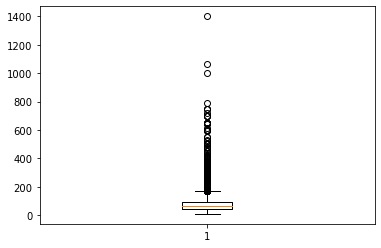

In [45]:
Q1 = np.percentile(df6['bath'], 25.) # 25th percentile of the data of the given feature 
Q3 = np.percentile(df6['bath'], 75.) # 75th percentile of the data of the given feature 
IQR = Q3-Q1 #Interquartile Range
ll = Q1 - (1.5*IQR) 
ul = Q3 + (1.5*IQR)
upper_outliers = df6[df6['bath'] > ul].index.tolist() 
lower_outliers = df6[df6['bath'] < ll].index.tolist() 
bad_indices = list(set(upper_outliers + lower_outliers)) 
drop = True
if drop:
    df6.drop(bad_indices, inplace = True, errors = 'ignore')
plt.boxplot(df6['price']) 
plt.show()

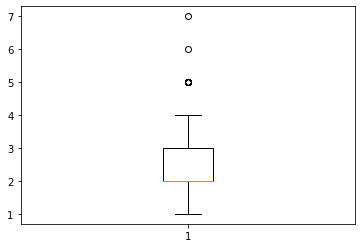

In [46]:
Q1 = np.percentile(df6['price'], 25.) # 25th percentile of the data of the given feature 
Q3 = np.percentile(df6['price'], 75.) # 75th percentile of the data of the given feature 
IQR = Q3-Q1 #Interquartile Range
ll = Q1 - (1.5*IQR) 
ul = Q3 + (1.5*IQR)
 
upper_outliers = df6[df6['price'] > ul].index.tolist() 
lower_outliers = df6[df6['price'] < ll].index.tolist() 
bad_indices = list(set(upper_outliers + lower_outliers)) 
drop = True
if drop:
    df6.drop(bad_indices, inplace = True, errors = 'ignore')

plt.boxplot(df6['bhk']) 
plt.show()

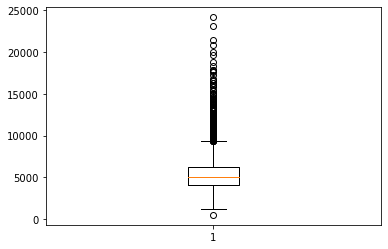

In [47]:
Q1 = np.percentile(df6['bhk'], 25.) # 25th percentile of the data of the given feature 
Q3 = np.percentile(df6['bhk'], 75.) # 75th percentile of the data of the given feature 
IQR = Q3-Q1 #Interquartile Range
ll = Q1 - (1.5*IQR) 
ul = Q3 + (1.5*IQR)
upper_outliers = df6[df6['bhk'] > ul].index.tolist() 
lower_outliers = df6[df6['bhk'] < ll].index.tolist() 
bad_indices = list(set(upper_outliers + lower_outliers)) 
drop = True
if drop:
    df6.drop(bad_indices, inplace = True, errors = 'ignore')

plt.boxplot(df6['price_per_sqft']) 
plt.show()

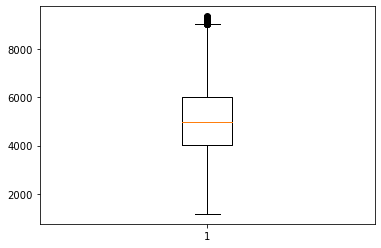

In [48]:
Q1 = np.percentile(df6['price_per_sqft'], 25.) # 25th percentile of the data of the given feature 
Q3 = np.percentile(df6['price_per_sqft'], 75.) # 75th percentile of the data of the given feature 
IQR = Q3-Q1 #Interquartile Range
ll = Q1 - (1.5*IQR) 
ul = Q3 + (1.5*IQR)
upper_outliers = df6[df6['price_per_sqft'] > ul].index.tolist() 
lower_outliers = df6[df6['price_per_sqft'] < ll].index.tolist() 
bad_indices = list(set(upper_outliers + lower_outliers))
drop = True 
if drop:
    df6.drop(bad_indices, inplace = True, errors = 'ignore')

plt.boxplot(df6['price_per_sqft']) 
plt.show()

In [49]:
df6.shape

(10090, 7)

In [50]:
X = df6.drop(['price'],axis='columns') 
X.head(3)

,location,size,total_sqft,bath,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,2,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,3,6245.890861


In [51]:
X.shape 

(10090, 6)

In [52]:
y = df6.price 
y.head(3)

0    39.07
2    62.00
3    95.00
Name: price, dtype: float64

In [53]:
len(y)

10090

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

X_train.shape 

(8072, 6)

In [55]:
y_train.shape 

(8072,)

In [56]:
X_test.shape 

(2018, 6)

In [57]:
y_test.shape 

(2018,)